In [ ]:
import numpy as np
import pandas as pd

## Neural Network

### Helper Functions For Gradient Descent

In [ ]:
def initialize_parameters():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

In [ ]:
def ReLU(x): # x is an array
  return np.maximum(0, x) # operates element-wise on array x

In [ ]:
def deriv_ReLU(x): # x is an array
  return np.where(x > 0, 1, 0)

In [ ]:
def softmax(x):
    A = np.exp(x) / np.sum(np.exp(x), axis=0)  # Sum along axis 0 (columns)
    return A

In [ ]:
def forward_prop(W1, b1, W2, b2, a0):
  z1 = W1.dot(a0) + b1  # (10 x 784) dot (784 x N) + (10 x 1) = (10 x N)
  a1 = ReLU(z1)         # (10 x N)
  z2 = W2.dot(a1) + b2 # (10 x 10) dot (10 x N) + (10 x 1) = (10 x N)
  a2 = softmax(z2)      # (10 x N)
  return z1, a1, z2, a2

In [ ]:
def one_hot(labels):
  num_classes = labels.max() + 1  # Determine the number of unique classes/labels
  num_samples = labels.size      # Get the number of data samples
  one_hot_labels = np.zeros((num_samples, num_classes)) # Create a 2D array with the correct shape
  one_hot_labels[np.arange(num_samples), labels] = 1 # Set the appropriate elements to 1
  return one_hot_labels.T # Transpose the array for the desired output shape (10 x N)

In [ ]:
def backprop(a0, z1, a1, z2, a2, W2, labels):
  N = labels.size
  y = one_hot(labels) # (10 x N)
  delta2 = a2 - y     # (10 x N) (each delta_l is a column)
  dC_dW2 = (1 / N) * delta2.dot(a1.T)   # (10 x N) dot (N x 10) = (10 x 10)
  dC_db2 = (1 / N) * np.sum(delta2, axis=1, keepdims=True)  # (10 x 1)  (average columns of delta2)
  delta1 = W2.T.dot(delta2) * deriv_ReLU(z1)
  dC_dW1 = (1 / N) * delta1.dot(a0.T)
  dC_db1 = (1 / N) * np.sum(delta1, axis=1, keepdims=True)
  return dC_dW1, dC_db1, dC_dW2, dC_db2

In [ ]:
def update_parameters(W1, b1, W2, b2, dC_dW1, dC_db1, dC_dW2, dC_db2, alpha):
  W1 = W1 - (alpha * dC_dW1)
  b1 = b1 - (alpha * dC_db1)
  W2 = W2 - (alpha * dC_dW2)
  b2 = b2 - (alpha * dC_db2)
  return W1, b1, W2, b2

In [ ]:
def get_predictions(a2):
  return np.argmax(a2, 0)

In [ ]:
def get_accuracy(predictions, labels):
  return np.sum(predictions == labels) / labels.size

### Gradient Descent Algorithm

In [ ]:
def gradient_descent(train_data, labels, iterations, learning_rate):
  a0 = train_data
  alpha = learning_rate
  W1, b1, W2, b2 = initialize_parameters()
  for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(W1, b1, W2, b2, a0)
    dC_dW1, dC_db1, dC_dW2, dC_db2 = backprop(a0, z1, a1, z2, a2, W2, labels)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dC_dW1, dC_db1, dC_dW2, dC_db2, alpha)

    if i % 10 == 0:
      predictions = get_predictions(a2)
      accuracy = get_accuracy(predictions, labels)
      print(f"Iteration: {i}")
      print(predictions, labels)
      print(f"Accuracy: {accuracy}")

  return W1, b1, W2, b2

## Creating and Training


### Read in MNIST Data File




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

train_data = pd.read_csv("/content/drive/My Drive/profesh/digit_classifier/mnist_train.csv")

MessageError: Error: credential propagation was unsuccessful

### Parse Data

In [ ]:
train_data = np.array(train_data)
labels = train_data[:,0] # the first column
train_data = train_data[:,1:].T # slice out the first column, transpose so each input is a column
train_data = train_data / 255.0


### Training Neural Network

In [ ]:
W1, b1, W2, b2 = gradient_descent(train_data, labels, 1000, 0.1)

Iteration: 0
[4 9 9 ... 9 9 9] [0 4 1 ... 5 6 8]
Accuracy: 0.09113485224753747
Iteration: 10
[2 4 7 ... 5 7 7] [0 4 1 ... 5 6 8]
Accuracy: 0.17953632560542676
Iteration: 20
[0 4 1 ... 5 7 7] [0 4 1 ... 5 6 8]
Accuracy: 0.27443790729845496
Iteration: 30
[0 4 1 ... 5 7 7] [0 4 1 ... 5 6 8]
Accuracy: 0.37340622343705726
Iteration: 40
[0 4 1 ... 5 7 7] [0 4 1 ... 5 6 8]
Accuracy: 0.4248904148402473
Iteration: 50
[0 4 1 ... 5 7 6] [0 4 1 ... 5 6 8]
Accuracy: 0.471341189019817
Iteration: 60
[0 4 1 ... 5 7 6] [0 4 1 ... 5 6 8]
Accuracy: 0.5148252470874515
Iteration: 70
[0 4 1 ... 5 6 6] [0 4 1 ... 5 6 8]
Accuracy: 0.5565092751545859
Iteration: 80
[0 4 1 ... 5 6 6] [0 4 1 ... 5 6 8]
Accuracy: 0.5936932282204703
Iteration: 90
[0 4 1 ... 5 6 6] [0 4 1 ... 5 6 8]
Accuracy: 0.6240770679511325
Iteration: 100
[0 4 1 ... 5 6 6] [0 4 1 ... 5 6 8]
Accuracy: 0.6483941399023317
Iteration: 110
[0 4 1 ... 5 6 6] [0 4 1 ... 5 6 8]
Accuracy: 0.6680278004633411
Iteration: 120
[0 4 1 ... 5 6 6] [0 4 1 ... 5 6 

## Testing

### Read in Test Data

In [ ]:
test_data = pd.read_csv("/content/drive/My Drive/profesh/Neural Network/mnist_test.csv")

In [ ]:
test_data = np.array(test_data)
test_labels = test_data[:,0] # the first column
test_data = test_data[:,1:].T # slice out the first column, transpose so each input is a column
test_data = test_data / 255.0

### Test Trials

In [ ]:
from matplotlib import pyplot as plt


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = test_data[:, index, None]
    prediction = make_predictions(test_data[:, index, None], W1, b1, W2, b2)
    label = test_labels[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


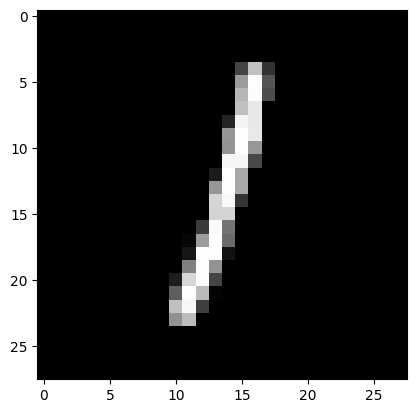

Prediction:  [1]
Label:  1


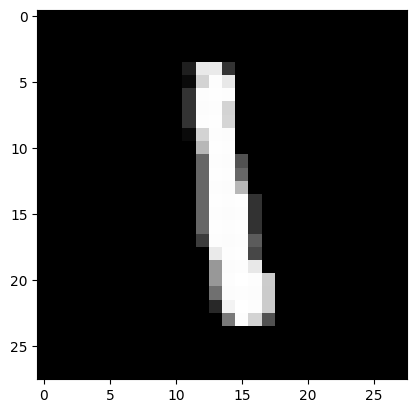

Prediction:  [7]
Label:  7


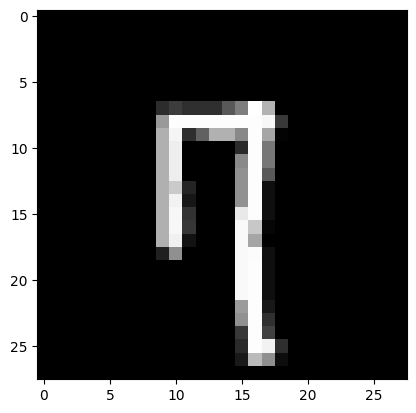

Prediction:  [5]
Label:  5


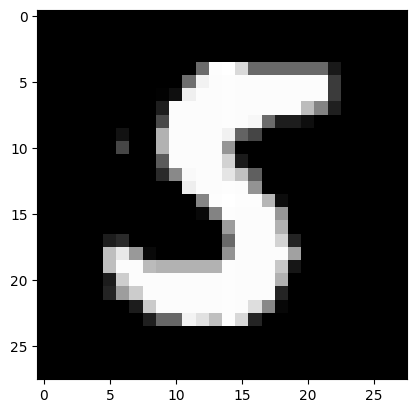

Prediction:  [7]
Label:  7


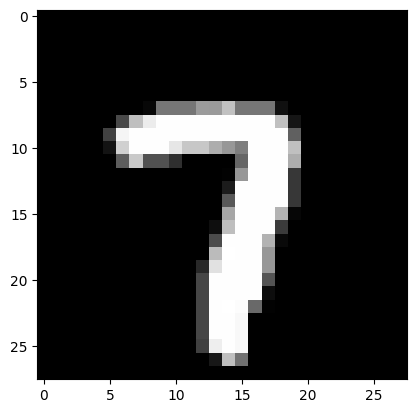

In [ ]:
# select 5 random test cases
num_tests = 5

for i in range(num_tests):
  index = np.random.randint(0, test_labels.size)
  test_prediction(index, W1, b1, W2, b2)